Installing libraries

In [ ]:
# !pip install numpy
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn
# !pip install scikit-learn
# !pip install umap-learn
# !pip install umap-learn[plot]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.9 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=346a57558348330497f100848be3d60ced95801a02f29d8b6274bfe2b73901a8
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 11.2 MB/s eta 0:00:00


Imporing libraries

In [ ]:
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn import manifold
from sklearn import preprocessing
from sklearn import utils
from collections import Counter
from umap import UMAP

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

input_file = "/content/drive/MyDrive/hepatitis.data"
dataset = pd.read_csv(input_file, header=None)

Mounted at /content/drive


In [ ]:
dataset = dataset.apply(pd.to_numeric, errors='coerce')
dataset = dataset.fillna(0)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,0.0,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,0.0,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,0.0,1
3,2,31,1,0.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,200.0,4.0,0.0,1


splitting the sample into training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, 0:], dataset.iloc[:, 0], test_size=0.3, random_state=109)

teaching classificator

In [ ]:
clf = svm.SVC(C=1, kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [ ]:
print("Проверка на тестовой выборке")
y_pred_test = clf.predict(X_test)
print(classification_report(y_test, y_pred_test))
print("Количество опорных векторов: ", len(clf.support_vectors_), "\n")

Проверка на тестовой выборке
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        35

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

Количество опорных векторов:  27 



In [ ]:
print("Проверка на обучающей выборке")
y_pred_train = clf.predict(X_train)
print(classification_report(y_train, y_pred_train))
print("Количество опорных векторов: ", len(clf.support_vectors_), "\n")

Проверка на обучающей выборке
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        88

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108

Количество опорных векторов:  27 



In [ ]:
# Перебор по сетке Grid Search различных типов ядер и выбор лучшего классификатора
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [1, 10, 100, 1000], 'kernel': ['poly']},
  {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid']}
 ]
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

print("Лучший классификатор и параметры")
print(grid.best_params_)
print(grid.best_estimator_,"\n")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ................C=1, kernel=linear;, score=1.000 total time=   5.1s
[CV 2/5] END ................C=1, kernel=linear;, score=1.000 total time=   2.0s
[CV 3/5] END ................C=1, kernel=linear;, score=1.000 total time=   0.6s
[CV 4/5] END ................C=1, kernel=linear;, score=1.000 total time=   1.3s
[CV 5/5] END ................C=1, kernel=linear;, score=1.000 total time=   6.3s
[CV 1/5] END ...............C=10, kernel=linear;, score=1.000 total time=   1.0s
[CV 2/5] END ...............C=10, kernel=linear;, score=1.000 total time=   0.5s
[CV 3/5] END ...............C=10, kernel=linear;, score=1.000 total time=   0.2s
[CV 4/5] END ...............C=10, kernel=linear;, score=1.000 total time=   0.3s
[CV 5/5] END ...............C=10, kernel=linear;, score=1.000 total time=   5.8s
[CV 1/5] END ..............C=100, kernel=linear;, score=1.000 total time=   1.8s
[CV 2/5] END ..............C=100, kernel=linear

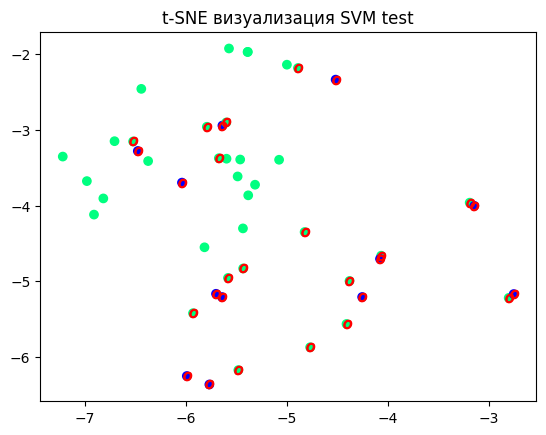

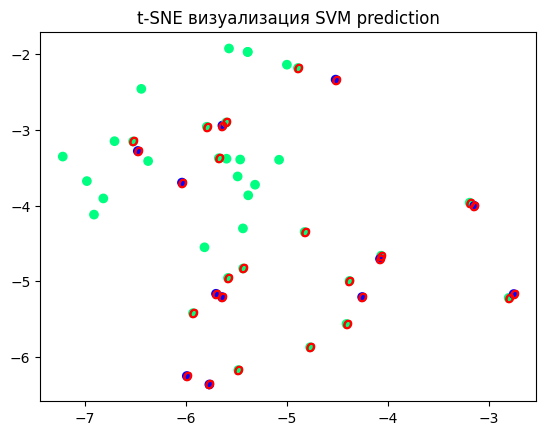

In [ ]:
# визуализацияя t-SNE
features = dataset.iloc[:, 0:]
target = dataset.iloc[:,0]

tsne = TSNE()

tsne_res = tsne.fit_transform(X_test)

clf.fit(tsne_res, y_test)

plt.scatter(tsne_res[:, 0], tsne_res[:, 1], c=y_test, cmap='winter')
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], marker='$O$', c='red')
plt.title("t-SNE визуализация SVM test")
plt.show()

clf.fit(tsne_res, y_pred_test)
plt.scatter(tsne_res[:, 0], tsne_res[:, 1], c=y_pred_test, cmap='winter')
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], marker='$O$', c='red')
plt.title("t-SNE визуализация SVM prediction")
plt.show()

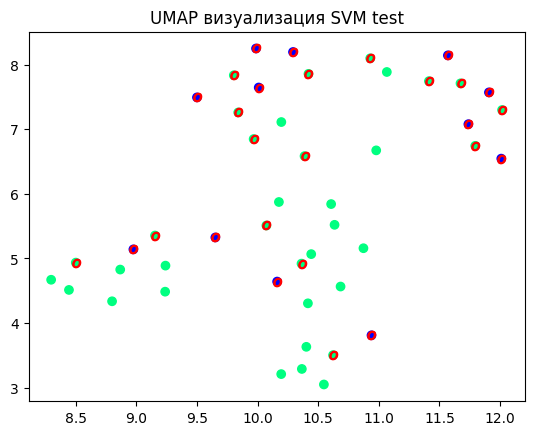

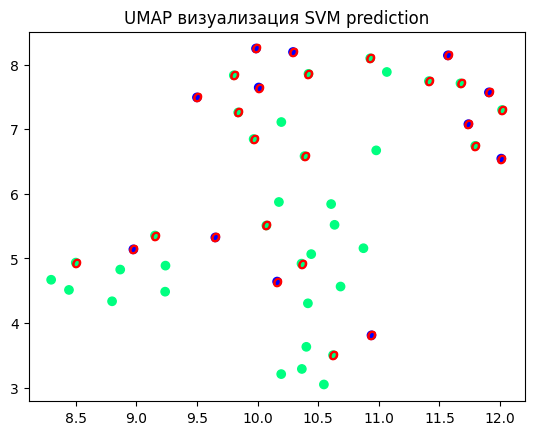

In [ ]:
# визуализацияя UMAP
umap = UMAP()

umap_res = umap.fit_transform(X_test)

clf.fit(umap_res, y_test)

plt.scatter(umap_res[:, 0], umap_res[:, 1], c=y_test, cmap='winter')
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], marker='$O$', c='red')
plt.title("UMAP визуализация SVM test")
plt.show()

clf.fit(umap_res, y_pred_test)
plt.scatter(umap_res[:, 0], umap_res[:, 1], c=y_pred_test, cmap='winter')
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], marker='$O$', c='red')
plt.title("UMAP визуализация SVM prediction")
plt.show()


In [ ]:
#KNN

In [ ]:
# обучаем классификатор
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
print("Проверка на тестовой выборке")
y_pred_test = knn.predict(X_test)
print(classification_report(y_test, y_pred_test))

Проверка на тестовой выборке
              precision    recall  f1-score   support

           1       0.37      0.58      0.45        12
           2       0.82      0.66      0.73        35

    accuracy                           0.64        47
   macro avg       0.59      0.62      0.59        47
weighted avg       0.71      0.64      0.66        47



In [ ]:
print("Проверка на обучающей выборке")
y_pred_train = knn.predict(X_train)
print(classification_report(y_train, y_pred_train))

Проверка на обучающей выборке
              precision    recall  f1-score   support

           1       0.56      1.00      0.71        20
           2       1.00      0.82      0.90        88

    accuracy                           0.85       108
   macro avg       0.78      0.91      0.81       108
weighted avg       0.92      0.85      0.87       108



In [ ]:
param_grid = [
  {'n_neighbors': [2, 3, 4], 'metric': ['euclidean'], 'weights': ['uniform']},
{'n_neighbors': [2, 3, 4], 'metric': ['euclidean'], 'weights': ['distance']},
{'n_neighbors': [2, 3, 4], 'metric': ['manhattan'], 'weights': ['uniform']},
{'n_neighbors': [2, 3, 4], 'metric': ['manhattan'], 'weights': ['distance']}]
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

print("\n","Лучший классификатор и параметры")
print(grid.best_params_,)
print(grid.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.773 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.773 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.773 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.524 total time=   0.1s
[CV 5/5] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.571 total time=   0.1s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.818 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.818 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.818 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.762 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.810 total ti

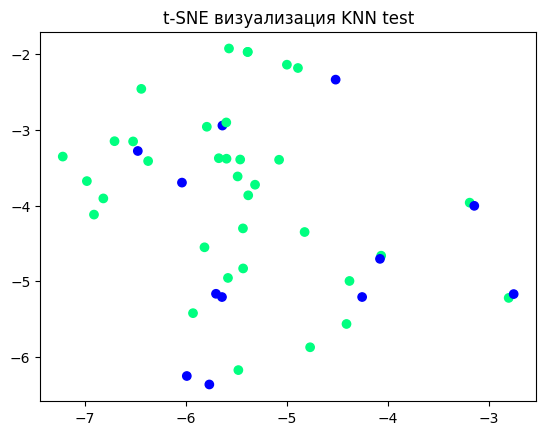

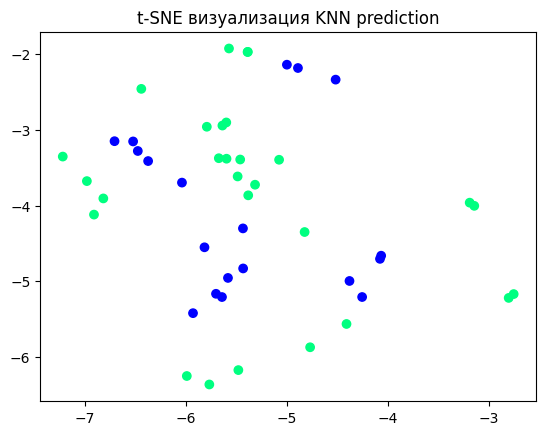

In [ ]:
#Визуализация t-SNE

features = dataset.iloc[:, 0:]
target = dataset.iloc[:,0]

tsne = TSNE()

tsne_res = tsne.fit_transform(X_test)

knn.fit(tsne_res, y_test)

plt.scatter(tsne_res[:, 0], tsne_res[:, 1], c=y_test, cmap='winter')
plt.title("t-SNE визуализация KNN test")
plt.show()

knn.fit(tsne_res, y_pred_test)
plt.scatter(tsne_res[:, 0], tsne_res[:, 1], c=y_pred_test, cmap='winter')
plt.title("t-SNE визуализация KNN prediction")
plt.show()

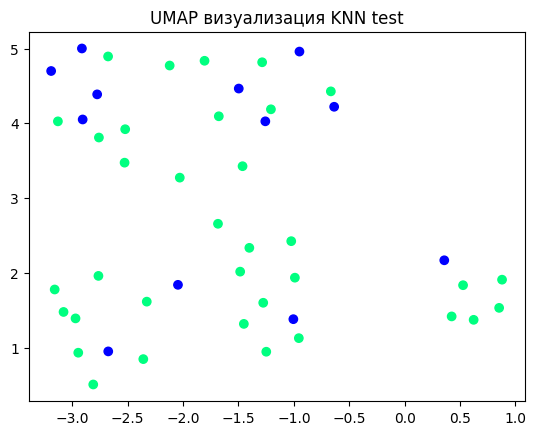

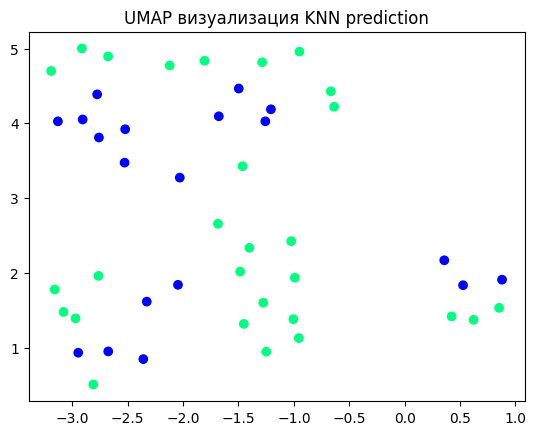

In [ ]:
#визуализация UMAP

umap_res = umap.fit_transform(X_test)

knn.fit(umap_res, y_test)

plt.scatter(umap_res[:, 0], umap_res[:, 1], c=y_test, cmap='winter')
plt.title("UMAP визуализация KNN test")
plt.show()

knn.fit(umap_res, y_pred_test)

plt.scatter(umap_res[:, 0], umap_res[:, 1], c=y_pred_test, cmap='winter')
plt.title("UMAP визуализация KNN prediction")
plt.show()

In [ ]:
#RF

In [ ]:
# обучение классификатора
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
print("Проверка на тестовой выборке", "\n")
y_pred2_test = rf.predict(X_test)
print(classification_report(y_test, y_pred2_test))

Проверка на тестовой выборке 

              precision    recall  f1-score   support

           1       1.00      0.75      0.86        12
           2       0.92      1.00      0.96        35

    accuracy                           0.94        47
   macro avg       0.96      0.88      0.91        47
weighted avg       0.94      0.94      0.93        47



In [ ]:
print("Проверка на обучающей выборке", "\n")
y_pred2_train = rf.predict(X_train)
print(classification_report(y_train, y_pred2_train))

Проверка на обучающей выборке 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        88

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108



In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

print("Лучший классификатор и параметры", "\n")
print(grid.best_params_,"\n")
print(grid.best_estimator_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.818 total time=   0.1s
[CV 2/5] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.909 total time=   0.1s
[CV 3/5] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.818 total time=   0.1s
[CV 4/5] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.810 total time=   0.1s
[CV 5/5] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.810 total time=   0.1s
[CV 1/5] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.818 total time=   0.2s
[CV 2/5] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.818 total time=   0.2s
[CV 3/5] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.818 total time=   0.2s
[CV 4/5

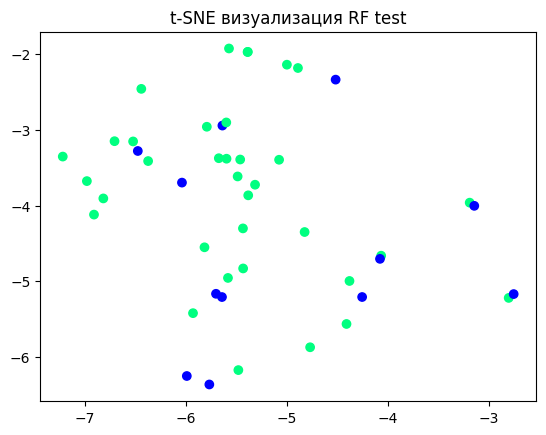

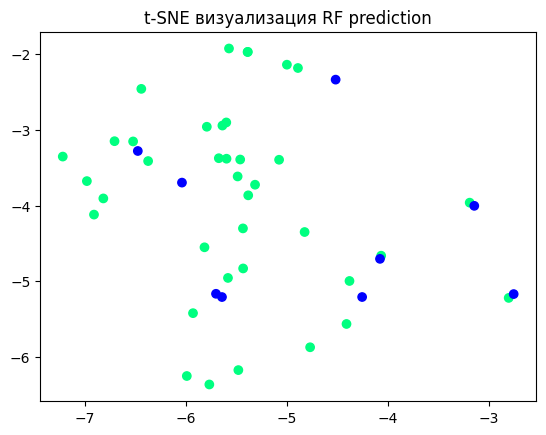

In [ ]:
#визуализация t-SNE
tsne_res = tsne.fit_transform(X_test)
rf.fit(tsne_res, y_test)

plt.scatter(tsne_res[:, 0], tsne_res[:, 1], c=y_test, cmap='winter')
plt.title("t-SNE визуализация RF test")
plt.show()

rf.fit(tsne_res, y_pred2_test)

plt.scatter(tsne_res[:, 0], tsne_res[:, 1], c=y_pred2_test, cmap='winter')
plt.title("t-SNE визуализация RF prediction")
plt.show()

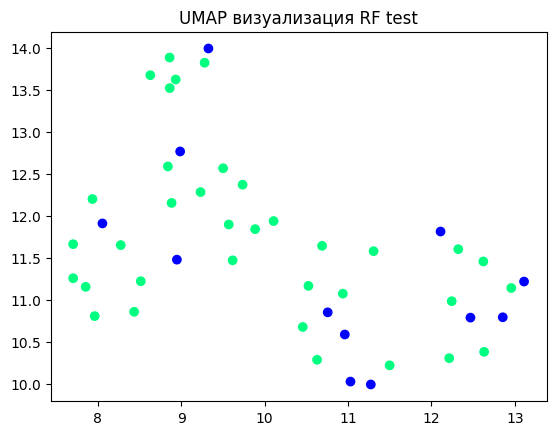

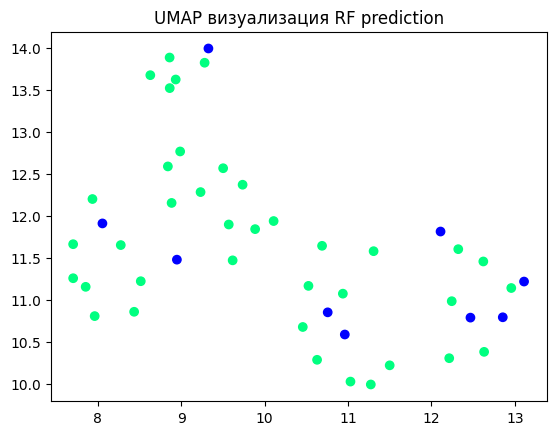

In [ ]:
# UMAP визуализация
umap_res = umap.fit_transform(X_test)

rf.fit(umap_res, y_test)

plt.scatter(umap_res[:, 0], umap_res[:, 1], c=y_test, cmap='winter')
plt.title("UMAP визуализация RF test")
plt.show()

rf.fit(umap_res, y_pred2_test)

plt.scatter(umap_res[:, 0], umap_res[:, 1], c=y_pred2_test, cmap='winter')
plt.title("UMAP визуализация RF prediction")
plt.show()